In [1]:
# 1) import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pip setuptools wheel

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/d4/55/90db48d85f7689ec6f81c0db0622d704306c5284850383c090e6c7195a5c/pip-24.2-py3-none-any.whl.metadata
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/ff/ae/f19306b5a221f6a436d8f2238d5b80925004093fa3edea59835b514d9057/setuptools-75.1.0-py3-none-any.whl.metadata
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/1b/d1/9babe2ccaecff775992753d8686970b1e2755d21c8a63be73aba7a4e7d77/wheel-0.44.0-py3-none-any.whl.metadata
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.44.0-py3-none-

ERROR: To modify pip, please run the following command:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip setuptools wheel


In [2]:
# 2) import the dataset
df=pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
# Move 'isFraud' column to the last position
columns = [col for col in df.columns if col != 'isFraud']  # List of columns without 'isFraud'
columns.append('isFraud')  # Add 'isFraud' to the end of the list

# Reorder the columns in the dataframe
df = df[columns]

# Check if the 'isFraud' column is now in the last position
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  isFraud  
0  M1979787155             0.0             0.0               0        0  
1  M2044282225             0.0             0.0               0        0  
2   C553264065             0.0             0.0               0        1  
3    C38997010         21182.0             0.0               0        1  
4  M1230701703             0.0             0.0               0        0  


In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,0,1


In [5]:
# 3) Handle the Null Values
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFlaggedFraud    False
isFraud           False
dtype: bool

In [6]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0        False  False   False     False          False           False   
1        False  False   False     False          False           False   
2        False  False   False     False          False           False   
3        False  False   False     False          False           False   
4        False  False   False     False          False           False   
...        ...    ...     ...       ...            ...             ...   
6362615  False  False   False     False          False           False   
6362616  False  False   False     False          False           False   
6362617  False  False   False     False          False           False   
6362618  False  False   False     False          False           False   
6362619  False  False   False     False          False           False   

         nameDest  oldbalanceDest  newbalanceDest

In [7]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.shape

(6362620, 11)

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

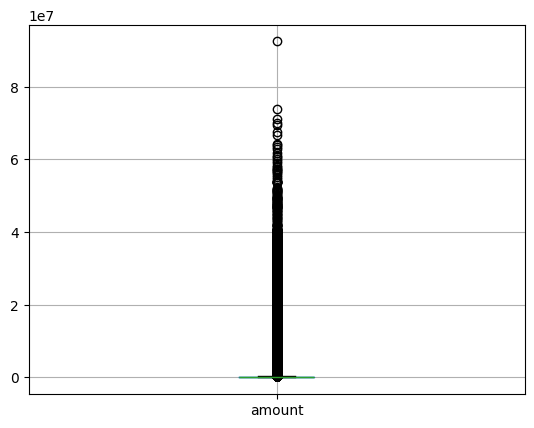

In [10]:
# outlier detection
df.boxplot(column='amount')

In [11]:
df.boxplot(column='newbalanceOrig')

<Axes: >

In [12]:
df.boxplot(column='newbalanceDest')

<Axes: >

In [13]:
df.boxplot(column='oldbalanceOrg')

<Axes: >

In [14]:


# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Relevant columns to check for outliers
columns_to_check = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Check and display outliers for each column
for col in columns_to_check:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}:")
    print(outliers[[col]].head())  # Display first few rows of outliers
    print(f"Number of outliers in {col}: {len(outliers)}")
    print('-' * 50)


Outliers in amount:
        amount
85  1505626.01
86   554026.99
88   761507.39
89  1429051.47
93   583848.46
Number of outliers in amount: 338078
--------------------------------------------------
Outliers in oldbalanceOrg:
    oldbalanceOrg
14      503264.00
37      300481.00
38      297689.58
62      882770.00
63      874042.26
Number of outliers in oldbalanceOrg: 1112507
--------------------------------------------------
Outliers in newbalanceOrig:
     newbalanceOrig
14        499165.22
62        874042.26
63        871442.79
241      6309146.87
242      6307878.90
Number of outliers in newbalanceOrig: 1053391
--------------------------------------------------
Outliers in oldbalanceDest:
     oldbalanceDest
94       3470595.10
96       5195482.15
113      5776776.41
156      5862200.03
171      6048647.54
Number of outliers in oldbalanceDest: 786135
--------------------------------------------------
Outliers in newbalanceDest:
    newbalanceDest
48      6453430.91
83      3420103.

Number of outliers in amount: 338078
        amount  isFraud
85  1505626.01        0
86   554026.99        0
88   761507.39        0
89  1429051.47        0
93   583848.46        0
Number of outliers in oldbalanceOrg: 1112507
    oldbalanceOrg  isFraud
14      503264.00        0
37      300481.00        0
38      297689.58        0
62      882770.00        0
63      874042.26        0
Number of outliers in newbalanceOrig: 1053391
     newbalanceOrig  isFraud
14        499165.22        0
62        874042.26        0
63        871442.79        0
241      6309146.87        0
242      6307878.90        0
Number of outliers in oldbalanceDest: 786135
     oldbalanceDest  isFraud
94       3470595.10        0
96       5195482.15        0
113      5776776.41        0
156      5862200.03        0
171      6048647.54        0
Number of outliers in newbalanceDest: 738527
    newbalanceDest  isFraud
48      6453430.91        0
83      3420103.09        0
84     19169204.93        0
85      5515763.

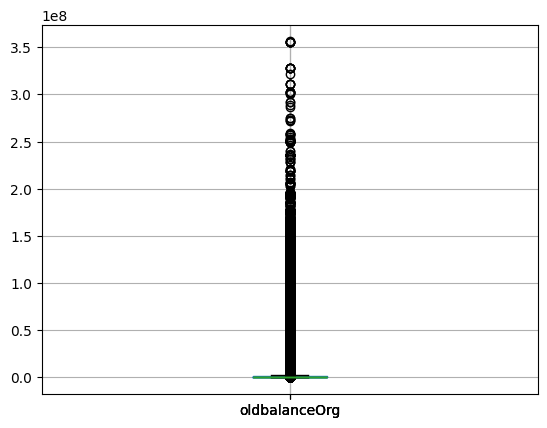

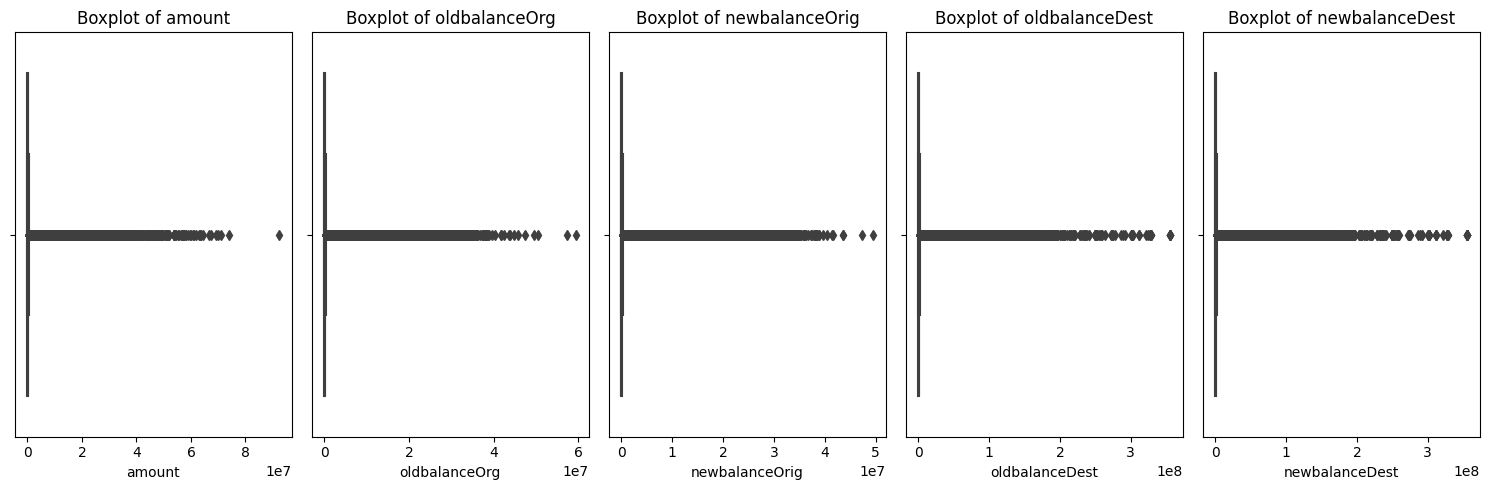

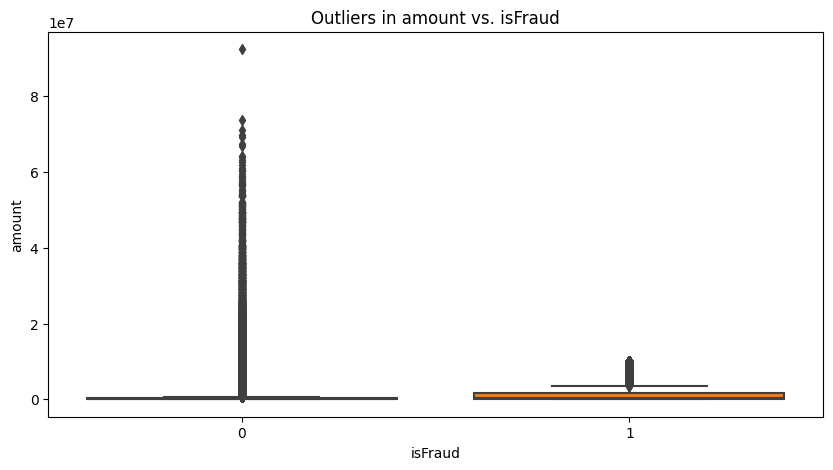

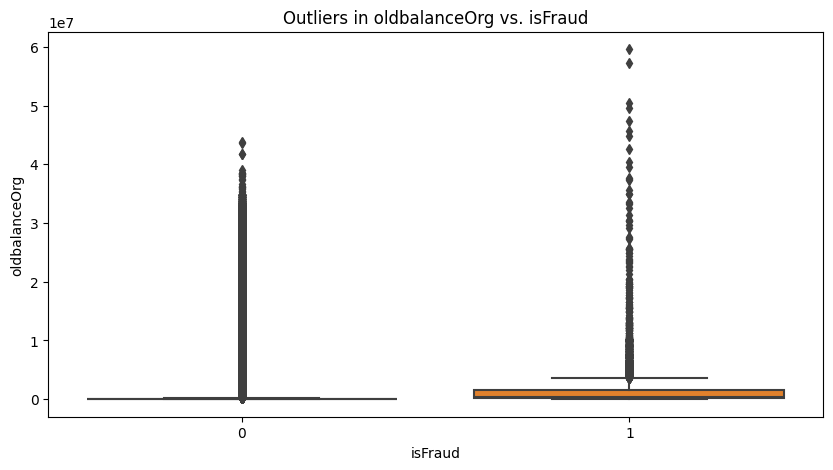

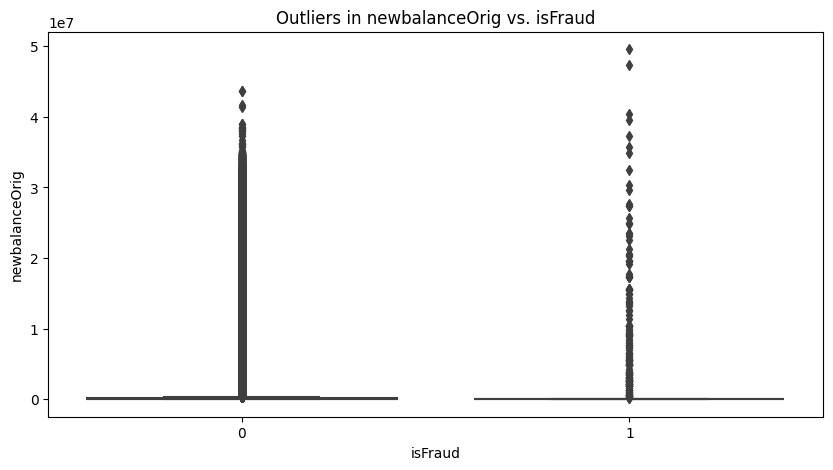

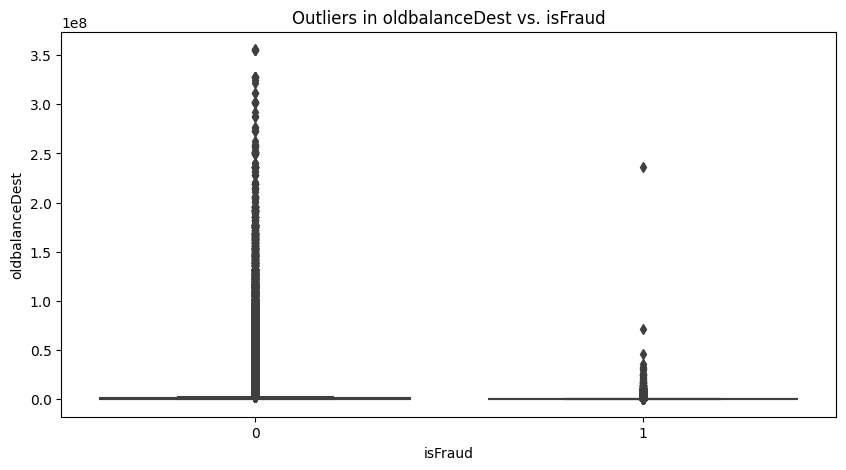

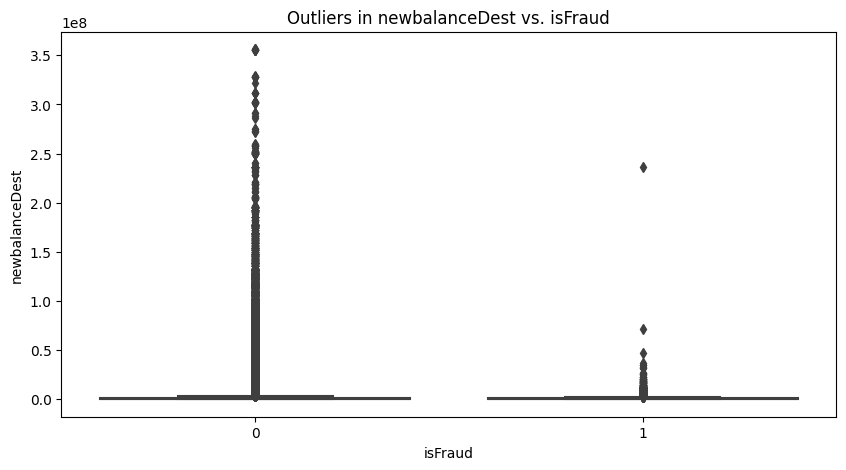

In [15]:




# Function to identify outliers using IQR
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Analyze outliers in relevant columns
outlier_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

outlier_summary = {}

for col in outlier_columns:
    outliers = identify_outliers_iqr(df, col)
    outlier_summary[col] = outliers
    print(f"Number of outliers in {col}: {len(outliers)}")
    
    # Optionally, display some of the outliers
    print(outliers[[col, 'isFraud']].head())  # Show outliers along with isFraud

# Visualization of outliers using boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Additional analysis to check correlation with isFraud
for col in outlier_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='isFraud', y=col, data=df)
    plt.title(f'Outliers in {col} vs. isFraud')
    plt.show()


In [16]:


# Filter the DataFrame for type = 'PAYMENT' and newbalanceOrig = 0
filtered_df = df[(df['type'] == 'PAYMENT') & (df['newbalanceOrig'] == 0)]

# Display the isFraud values along with other relevant information if needed
result = filtered_df[['isFraud',  'oldbalanceOrg', 'nameOrig', 'nameDest']]

# Show the results
print(result)


         isFraud  oldbalanceOrg     nameOrig     nameDest
8              0        2671.00  C1265012928  M1176932104
13             0       10127.00  C1716932897   M801569151
16             0         450.00   C761750706  M1731217984
25             0         443.00  C1043358826  M1558079303
28             0        2958.91  C1632497828    M33419717
...          ...            ...          ...          ...
6362299        0        7155.00  C1526212626  M1418729275
6362310        0         360.00  C1532874529   M265333537
6362311        0         155.00   C590780626  M2101529217
6362314        0       10182.00  C1045048098  M1878955882
6362316        0          12.00  C1203084509   M675916850

[1101124 rows x 4 columns]


In [17]:
# Filter the DataFrame for type = 'PAYMENT' and newbalanceOrig = 0
filtered_df = df[(df['type'] == 'PAYMENT') & (df['newbalanceOrig'] >0)]

# Display the isFraud values along with other relevant information if needed
result = filtered_df[['isFraud',  'oldbalanceOrg', 'nameOrig', 'nameDest']]

# Show the results
print(result)

         isFraud  oldbalanceOrg     nameOrig     nameDest
0              0       170136.0  C1231006815  M1979787155
1              0        21249.0  C1666544295  M2044282225
4              0        41554.0  C2048537720  M1230701703
5              0        53860.0    C90045638   M573487274
6              0       183195.0   C154988899   M408069119
...          ...            ...          ...          ...
6362308        0        21582.0   C377150948   M237719117
6362309        0        29136.0  C1674178673   M453551193
6362312        0        11742.0  C1213413071  M1112540487
6362318        0         5521.0   C673558958  M1126011651
6362319        0       518802.0   C642813806   M747723689

[1050371 rows x 4 columns]


In [18]:

# Filter the DataFrame for type = 'PAYMENT' and newbalanceOrig = 0
filtered_df = df[(df['type'] == 'TRANSFER') & (df['newbalanceOrig'] == 0.00)]

# Display the isFraud values along with other relevant information if needed
result = filtered_df[['isFraud',  'oldbalanceOrg', 'nameOrig', 'nameDest']]

# Show the results
print(result)

         isFraud  oldbalanceOrg     nameOrig     nameDest
2              1         181.00  C1305486145   C553264065
19             0         705.00  C1670993182  C1100439041
24             0       10835.00  C1984094095   C932583850
78             0       10363.39   C283039401  C1330106945
79             0           0.00   C207471778  C1761291320
...          ...            ...          ...          ...
6362610        1       63416.99   C778071008  C1812552860
6362612        1     1258818.82  C1531301470  C1470998563
6362614        1      339682.13  C2013999242  C1850423904
6362616        1     6311409.28  C1529008245  C1881841831
6362618        1      850002.52  C1685995037  C2080388513

[511445 rows x 4 columns]


In [19]:
# Filter the DataFrame for type = 'PAYMENT' and newbalanceOrig = 0
filtered_df = df[(df['type'] == 'TRANSFER') & (df['newbalanceOrig'] == 0.00) & (df['isFlaggedFraud']==1)]

# Display the isFraud values along with other relevant information if needed
result = filtered_df[['isFraud',  'oldbalanceOrg', 'nameOrig', 'nameDest']]

# Show the results
print(result)

Empty DataFrame
Columns: [isFraud, oldbalanceOrg, nameOrig, nameDest]
Index: []


In [20]:


# Count the number of rows where isFlaggedFraud is 1
num_flagged = df[df['isFlaggedFraud'] == 1].shape[0]

# Display the number of flagged rows
print(f'Number of rows where isFlaggedFraud = 1: {num_flagged}')

Number of rows where isFlaggedFraud = 1: 16


In [21]:


# Assuming df is your DataFrame
df_flagged = df[df['isFlaggedFraud'] == 1]

# Display the filtered DataFrame
df_flagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [22]:


# Filter the rows where the condition is met
fraudulent_transactions = df[df['amount'] == (df['newbalanceDest'] - df['oldbalanceDest'])]

# Display the 'isFraud' values of those rows
#print(fraudulent_transactions[['isFraud']])
fraudulent_transactions


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
811,1,TRANSFER,84212.94,C1336775847,53199.00,0.00,C13329486,0.00,84212.94,0,0
1169,1,CASH_OUT,9980.32,C1589466857,12936.00,2955.68,C1018298342,0.00,9980.32,0,0
1204,1,TRANSFER,19772.53,C792488644,0.00,0.00,C2094777811,44486.99,64259.52,0,0
1428,1,TRANSFER,139555.44,C1733619456,19466.00,0.00,C317071334,0.00,139555.44,0,0
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.00,C1364913072,9083.76,34155.22,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362601,742,CASH_OUT,652993.91,C1614818636,652993.91,0.00,C362803701,0.00,652993.91,0,1
6362603,742,CASH_OUT,1819543.69,C1039979813,1819543.69,0.00,C2078394828,0.00,1819543.69,0,1
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,0,1
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.00,C846260566,343660.89,647507.63,0,1


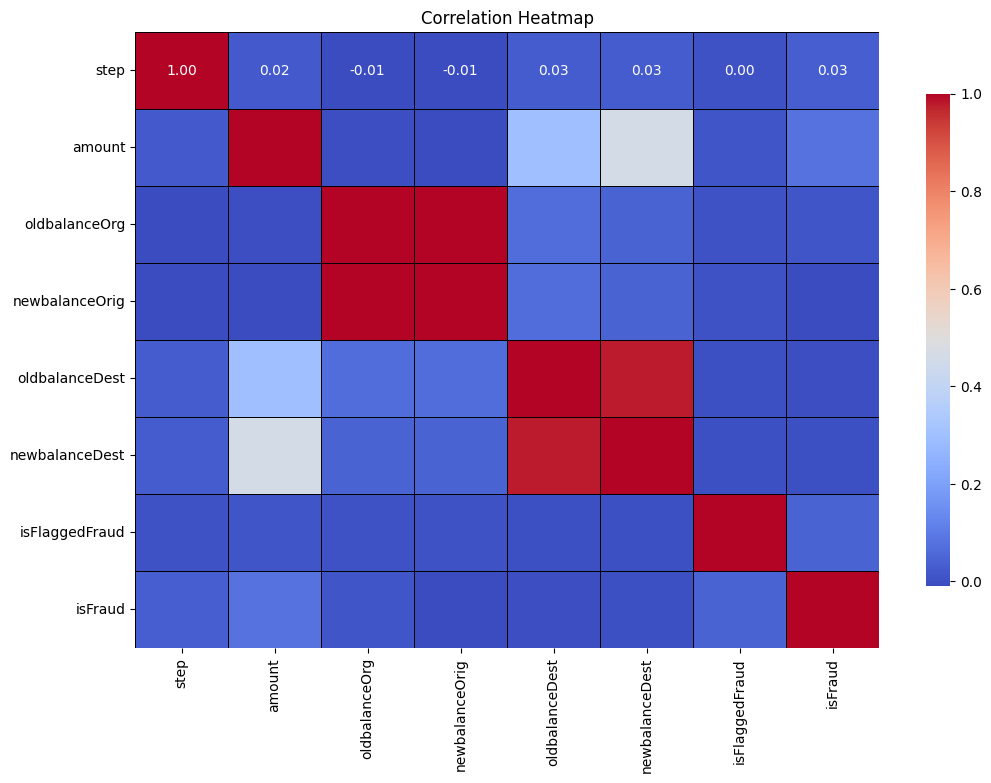

In [23]:



# Calculate the correlation matrix, ensuring only numeric columns are included
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap with annotations
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# Convert the 'isFraud' column to a smaller data type
df['isFraud'] = df['isFraud'].astype('uint8')

# Check the result to confirm the data type change
print(df.dtypes['isFraud'])


uint8


In [45]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder






In [46]:

# Step 1: Encode the 'type' categorical feature using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

# Drop any unnecessary columns such as 'nameOrig' and 'nameDest' (as they are IDs)
df_encoded = df_encoded.drop(['nameOrig', 'nameDest','step'], axis=1)

# Step 2: Define X (independent variables) and y (dependent variable) - assuming 'isFraud' is the target
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']

In [47]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


In [48]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: uint8

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFlaggedFraud  int64  
 6   type_CASH_OUT   uint8  
 7   type_DEBIT      uint8  
 8   type_PAYMENT    uint8  
 9   type_TRANSFER   uint8  
dtypes: float64(5), int64(1), uint8(4)
memory usage: 315.5 MB


In [50]:
# Convert the 'isFlaggedFraud' column to a smaller data type
X['isFlaggedFraud'] = X['isFlaggedFraud'].astype('uint8')

# Check the result to confirm the data type change
print(X.dtypes['isFlaggedFraud'])


uint8


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFlaggedFraud  uint8  
 6   type_CASH_OUT   uint8  
 7   type_DEBIT      uint8  
 8   type_PAYMENT    uint8  
 9   type_TRANSFER   uint8  
dtypes: float64(5), uint8(5)
memory usage: 273.1 MB


In [52]:
# Find the maximum values for the specified columns
max_values = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max()

# Display the maximum values
print(max_values)


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrig    4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64


In [53]:
# Convert columns to float32 for storage efficiency in X
X['amount'] = X['amount'].astype('float32')
X['oldbalanceOrg'] = X['oldbalanceOrg'].astype('float32')
X['newbalanceOrig'] = X['newbalanceOrig'].astype('float32')
X['oldbalanceDest'] = X['oldbalanceDest'].astype('float32')
X['newbalanceDest'] = X['newbalanceDest'].astype('float32')




In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float32
 1   oldbalanceOrg   float32
 2   newbalanceOrig  float32
 3   oldbalanceDest  float32
 4   newbalanceDest  float32
 5   isFlaggedFraud  uint8  
 6   type_CASH_OUT   uint8  
 7   type_DEBIT      uint8  
 8   type_PAYMENT    uint8  
 9   type_TRANSFER   uint8  
dtypes: float32(5), uint8(5)
memory usage: 151.7 MB


In [55]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6362620 entries, 0 to 6362619
Series name: isFraud
Non-Null Count    Dtype
--------------    -----
6362620 non-null  uint8
dtypes: uint8(1)
memory usage: 6.1 MB


In [56]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Step 2: Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Step 3: Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 4: Display results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9997
Confusion Matrix:
[[1906269      82]
 [    531    1904]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.78      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

